# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = "../../assets/datasets/imdb_p6_sample.csv"
raw_data = pd.read_csv(filepath)

In [3]:
data = raw_data.copy()
data.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [21]:
from sklearn import preprocessing

y = data['rating']
# X['year'] = MinMaxScaler().fit_transform(X['year'].astype(float).reshape(-1, 1))
X = data.drop(labels = ['HA', 'rating', 'tconst', 'title'], axis = 1)
X.loc[:, 'year'] = preprocessing.MinMaxScaler().fit_transform(X['year'].astype(float).reshape(-1,1))
X.head()

,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,0.750000,0,1,0,1,0,0,0,1
1,0.406250,1,1,0,0,1,0,1,0
2,0.437500,1,1,0,0,1,0,0,1
3,0.968750,1,1,1,0,1,0,1,1
4,0.734375,1,1,1,1,1,1,1,1


## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

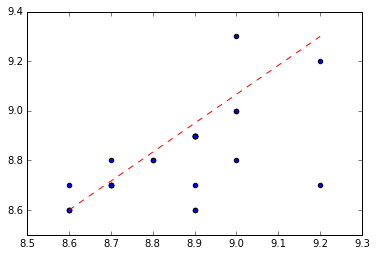

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X)

plt.scatter(predictions, y)
plt.plot((predictions.min(), predictions.max()), (y.min(), y.max()), 'r--')
plt.show()

In [10]:
cv_score = cross_val_score(dtree, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print(cv_score.mean(), cv_score.std())

-0.0846666666667 0.067613279432


## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

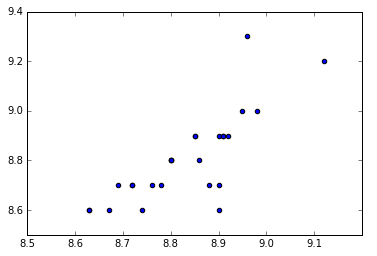

-0.0660722222222 0.0442483444623


In [12]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg = RandomForestRegressor(random_state=1)
rand_forest_reg.fit(X, y)
rand_forest_reg_predictions = rand_forest_reg.predict(X)

plt.scatter(rand_forest_reg_predictions, y)

plt.show()

rand_forest_cv_score = cross_val_score(rand_forest_reg, X, y, cv = 3, scoring = 'neg_mean_squared_error')
print(rand_forest_cv_score.mean(), rand_forest_cv_score.std())

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [20]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_reg = AdaBoostRegressor(random_state=1)
ada_boost_cv_score = cross_val_score(ada_boost_reg, X, y, cv = 3)
ada_boost_cv_score.mean()

-12.848634773662653

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.